#todo
1) Test assumptions of the regression
2) Formulate hypothesis
    - REad the bambi page. 
    - Model specification
3) Improve MCMC chain
4) Plot checks of regression
5) Check assumptions of bayesian model
6) Get partial correlation/coeffiecints for each group

In [25]:
from functions.data_functions import load_data, save_pickle, load_pickle
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')
import bambi as bmb
import arviz as az

## Read in data and preprocess data

In [26]:
pca_df = load_data('BEACON', 'pca_data')

In [27]:
comp = ['comp_1', 'comp_2','comp_3']

In [28]:
for component in comp:
    pca_df[f'{component}_t1_demean'] = pca_df[f'{component}_t1'] - pca_df[f'{component}_t1'].mean()

pca_df['group_ind'] = pca_df['group'].apply(lambda group: 0 if group =='HC' else 1)

In [29]:
pca_df

index participant  comp_1_t1  comp_2_t1  comp_3_t1  comp_1_t2  comp_2_t2  \
0        0       G1001  -3.319774  -0.009623  -0.988172        NaN        NaN   
1        1       G1002  -2.913537   0.070571  -0.299912  -3.557486  -0.645033   
2        2       G1004  -2.330221   0.827119   0.029195   2.387995   0.810593   
3        3       G1008  -2.865158   0.610074   0.846223        NaN        NaN   
4        4       G1010  -3.549291  -0.476134   0.393326        NaN        NaN   
..     ...         ...        ...        ...        ...        ...        ...   
169    169       G2137   1.260847  -1.322877  -1.481774        NaN        NaN   
170    170       G2138  -1.402611  -0.245159  -1.579789   0.222572  -0.068561   
171    171       G2139   0.710268   0.959405  -1.566979        NaN        NaN   
172    172       G2140   3.275019  -2.019297  -1.381370   4.714841  -1.933827   
173    173       G2141   2.948089  -0.776318  -0.442046   2.086426   1.213599   

     comp_3_t2 group  comp_1_t1_demean  comp_2_t1_demean  comp_3_t1_demean  \
0          NaN    HC         -3.319774         -0.009623         -0.988172   
1    -0.684848    HC         -2.913537          0.070571         -0.299912   
2     1.188566    HC         -2.330221          0.827119          0.029195   
3          NaN    HC         -2.865158          0.610074          0.846223   
4          NaN    HC         -3.549291         -0.476134          0.393326   
..         ...   ...               ...               ...               ...   
169        NaN    AN          1.260847         -1.322877         -1.481774   
170  -0.319396    AN         -1.402611         -0.245159         -1.579789   
171        NaN    AN          0.710268          0.959405         -1.566979   
172  -0.874109    AN          3.275019         -2.019297         -1.381370   
173  -0.510481    AN          2.948089         -0.776318         -0.442046   

     group_ind  
0            0  
1            0  
2            0  
3            0  
4            0  
..         ...  
169          1  
170          1  
171          1  
172          1  
173          1  

[174 rows x 13 columns]

## Difference at time point one

In [30]:
t1_models = {}

for component in comp:
    ttest = bmb.Model(f'{component}_t1 ~ 0 + group', data=pca_df.dropna())
    ttest_results = ttest.fit()
    t1_models[component] = ttest_results

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t1_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


In [31]:
save_pickle('t1_models', t1_models)

comp_1 

comp_2 

comp_3 



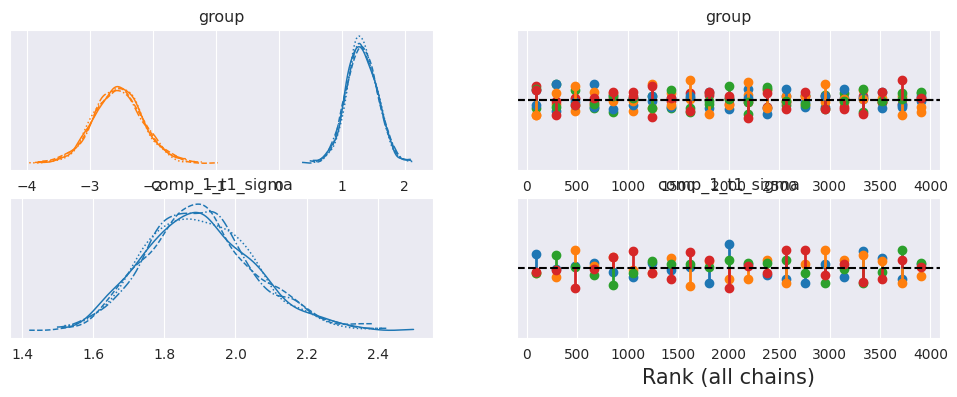

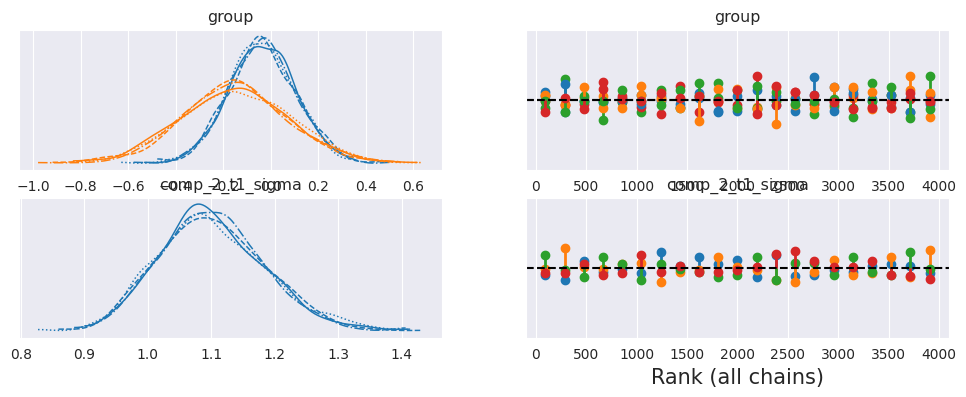

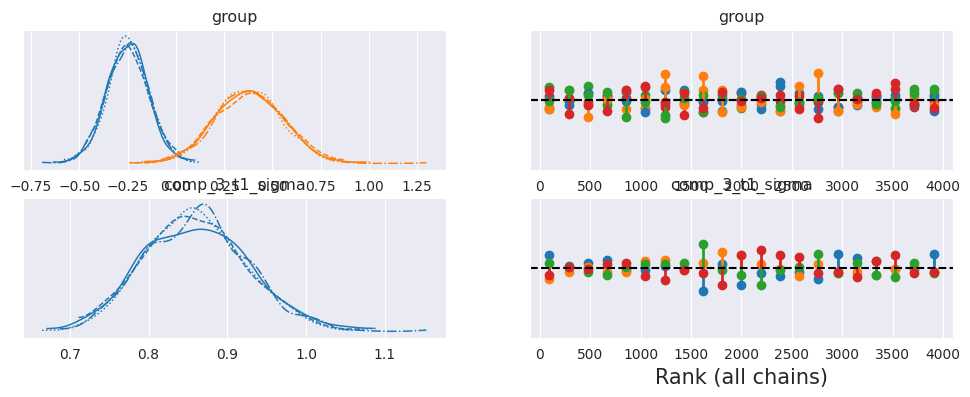

In [32]:
for model in t1_models.keys():
    print(model, '\n')
    az.plot_trace(t1_models[model], kind="rank_vlines")

In [33]:
t2_models = {}

for component in comp:
    ttest_t2 = bmb.Model(f'{component}_t2 ~ 0 + group', data=pca_df.dropna())
    ttest_t2_results = ttest_t2.fit()
    t2_models[component] = ttest_t2_results

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_1_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_2_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [group, comp_3_t2_sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.


In [34]:
save_pickle('t2_models', t2_models)

comp_1 

comp_2 

comp_3 



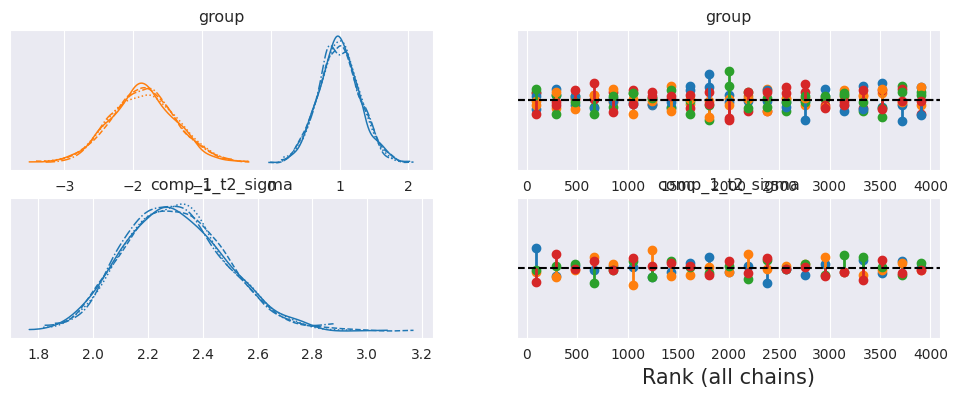

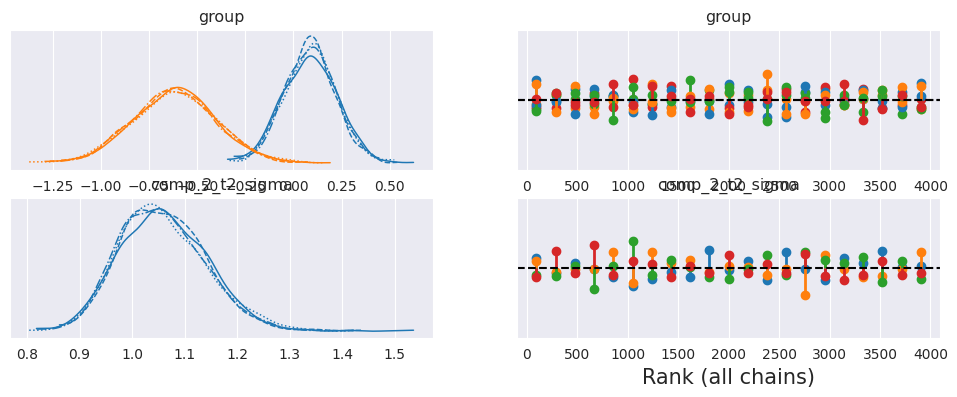

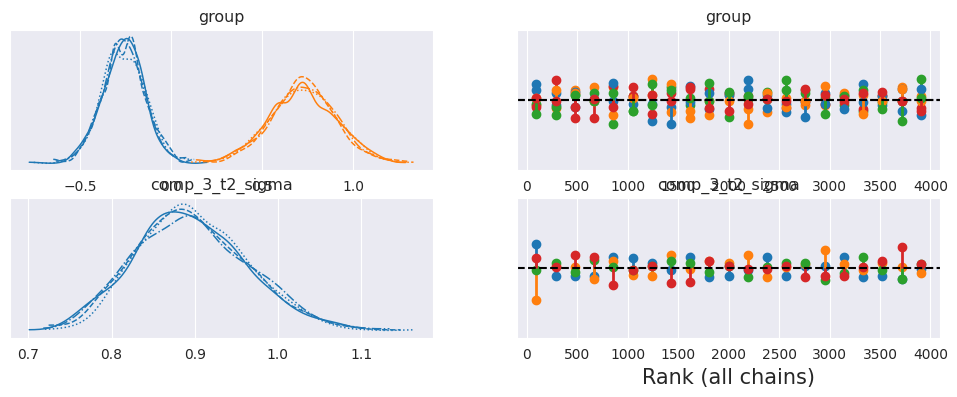

In [35]:
for model in t2_models.keys():
    print(model, '\n')
    az.plot_trace(t2_models[model], kind="rank_vlines")

## Defining and fitting the models

In [36]:
models = {
    'null':{},
    'alternative':{}
}

for model_component in comp:
    null = bmb.Model(f'{model_component}_t2 ~ 0 + (0 + {model_component}_t1_demean|participant)', data=pca_df.dropna(), noncentered=False)
    alternative = bmb.Model(f'{model_component}_t2 ~ 0 + {model_component}_t1_demean + group + (0 + {model_component}_t1_demean|group)', data=pca_df.dropna(), noncentered=False)

    models['null'][f'{model_component}'] = null
    models['alternative'][f'{model_component}'] = alternative


In [37]:
for alternative_model in models['alternative'].keys():
    print(models['alternative'][alternative_model], '\n')

Formula: comp_1_t2 ~ 0 + comp_1_t1_demean + group + (0 + comp_1_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 86
Priors:
  Common-level effects
    comp_1_t1_demean ~ Normal(mu: 0.0, sigma: 2.5443)
    group ~ Normal(mu: [0. 0.], sigma: [14.4176 14.4176])

  Group-level effects
    comp_1_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.5443))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.5868) 

Formula: comp_2_t2 ~ 0 + comp_2_t1_demean + group + (0 + comp_2_t1_demean|group)
Family name: Gaussian
Link: identity
Observations: 86
Priors:
  Common-level effects
    comp_2_t1_demean ~ Normal(mu: 0.0, sigma: 2.51)
    group ~ Normal(mu: [0. 0.], sigma: [6.044 6.044])

  Group-level effects
    comp_2_t1_demean|group ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.51))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0844) 

Formula: comp_3_t2 ~ 0 + comp_3_t1_demean + group + (0 + comp_3_t1_demean|group)
Family name: Gaussian
Lin

In [38]:
for null_models in models['null'].keys():
    print(models['null'][null_models], '\n')

Formula: comp_1_t2 ~ 0 + (0 + comp_1_t1_demean|participant)
Family name: Gaussian
Link: identity
Observations: 86
Priors:
  Group-level effects
    comp_1_t1_demean|participant ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.5443))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 2.5868) 

Formula: comp_2_t2 ~ 0 + (0 + comp_2_t1_demean|participant)
Family name: Gaussian
Link: identity
Observations: 86
Priors:
  Group-level effects
    comp_2_t1_demean|participant ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.51))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 1.0844) 

Formula: comp_3_t2 ~ 0 + (0 + comp_3_t1_demean|participant)
Family name: Gaussian
Link: identity
Observations: 86
Priors:
  Group-level effects
    comp_3_t1_demean|participant ~ Normal(mu: 0, sigma: HalfNormal(sigma: 2.7729))

  Auxiliary parameters
    sigma ~ HalfStudentT(nu: 4, sigma: 0.9859) 



In [39]:
draw_numb = 2000
tune_numb = 3000
target_accept_numb = 0.95

In [40]:
fitted_models ={
    'null':{},
    'alternative':{}
}

for alternative_model in models['alternative'].keys():
    alternative_fitted = models['alternative'][alternative_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['alternative'][alternative_model] = alternative_fitted

for null_model in models['null'].keys():
    null_fitted = models['null'][null_model].fit(draws=draw_numb, tune=tune_numb, target_accept=target_accept_numb)
    print('\n')
    fitted_models['null'][null_model] = null_fitted

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean, group, comp_1_t1_demean|group_sigma, comp_1_t1_demean|group, comp_1_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 114 seconds.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8131, but should be close to 0.95. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8927, but should be close to 0.95. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean, group, comp_2_t1_demean|group_sigma, comp_2_t1_demean|group, comp_2_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 105 seconds.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9031, but should be close to 0.95. Try to increase the number of tuning steps.
There were 10 divergences after tuning. Increase `target_accept` or reparameterize.
There were 21 divergences after tuning. Increase `target_accept` or reparameterize.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean, group, comp_3_t1_demean|group_sigma, comp_3_t1_demean|group, comp_3_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 107 seconds.
The acceptance probability does not match the target. It is 0.8905, but should be close to 0.95. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.9024, but should be close to 0.95. Try to increase the number of tuning steps.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_1_t1_demean|participant_sigma, comp_1_t1_demean|participant, comp_1_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 51 seconds.
The acceptance probability does not match the target. It is 0.8943, but should be close to 0.95. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8779, but should be close to 0.95. Try to increase the number of tuning steps.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_2_t1_demean|participant_sigma, comp_2_t1_demean|participant, comp_2_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 51 seconds.


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [comp_3_t1_demean|participant_sigma, comp_3_t1_demean|participant, comp_3_t2_sigma]


Sampling 4 chains for 3_000 tune and 2_000 draw iterations (12_000 + 8_000 draws total) took 51 seconds.


In [41]:
save_pickle('fitted_models_group', fitted_models)

## MCMC/model diagnositics

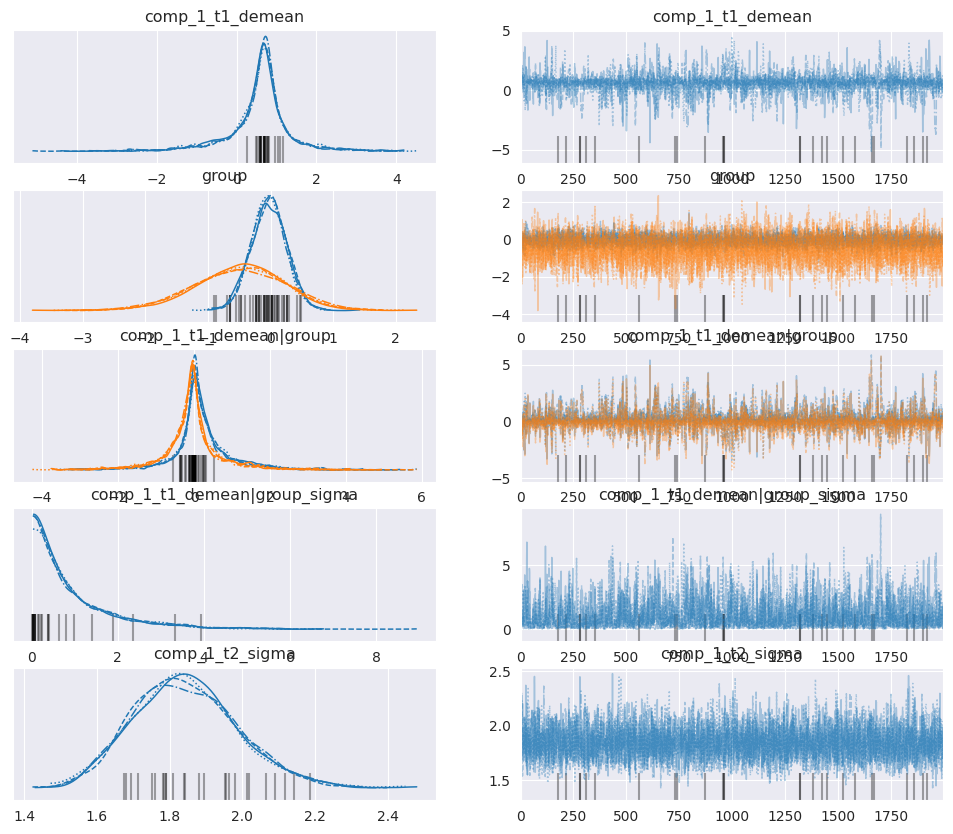

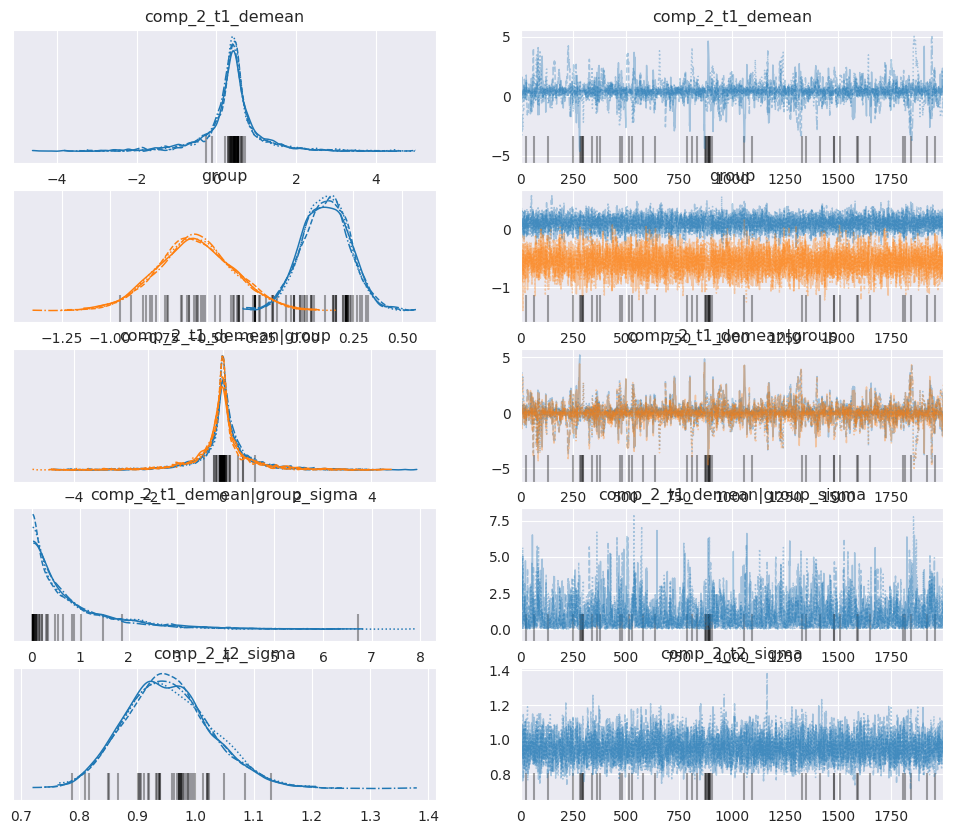

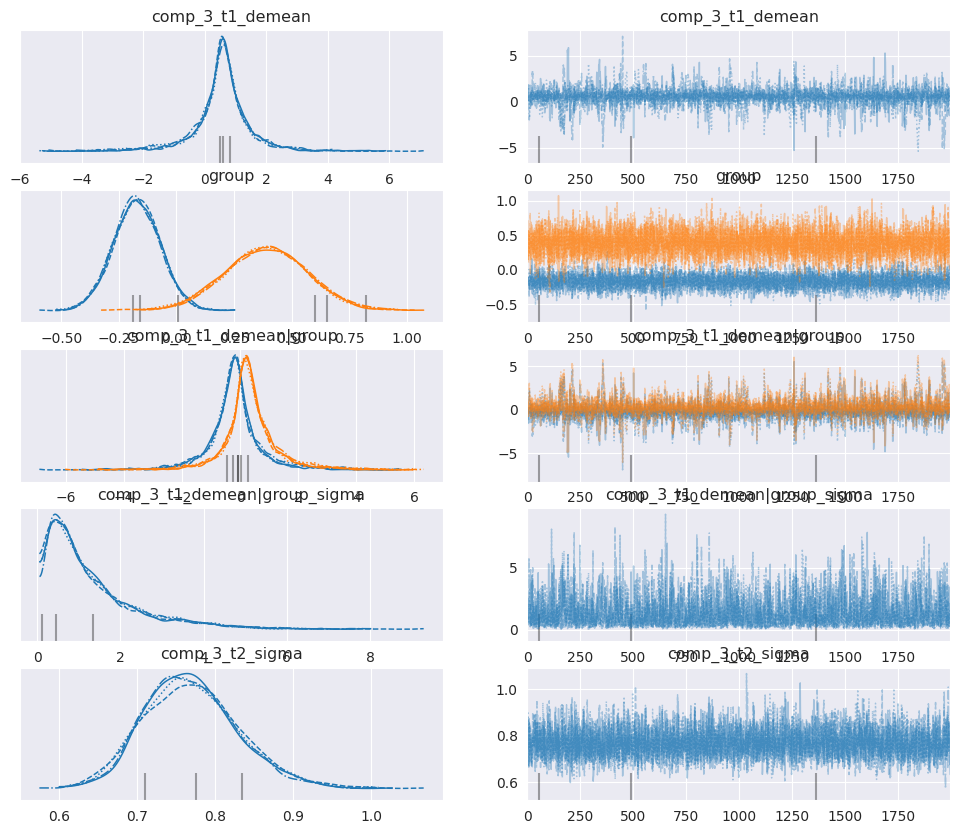

In [42]:
for model in comp:
    az.plot_trace(fitted_models['alternative'][model], compact=True)

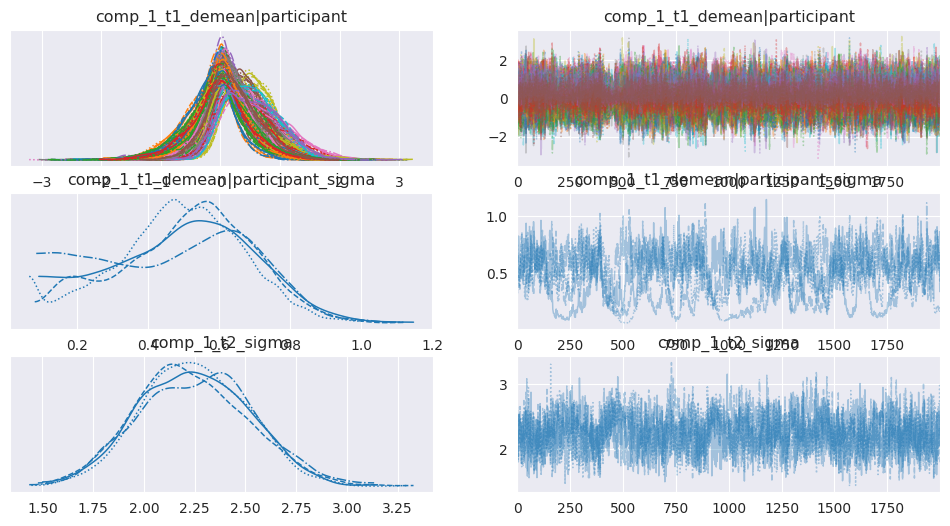

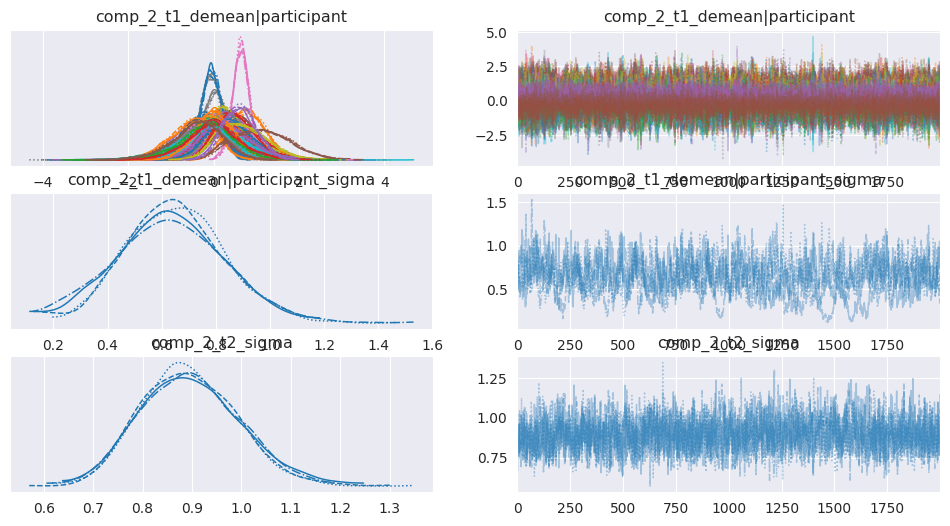

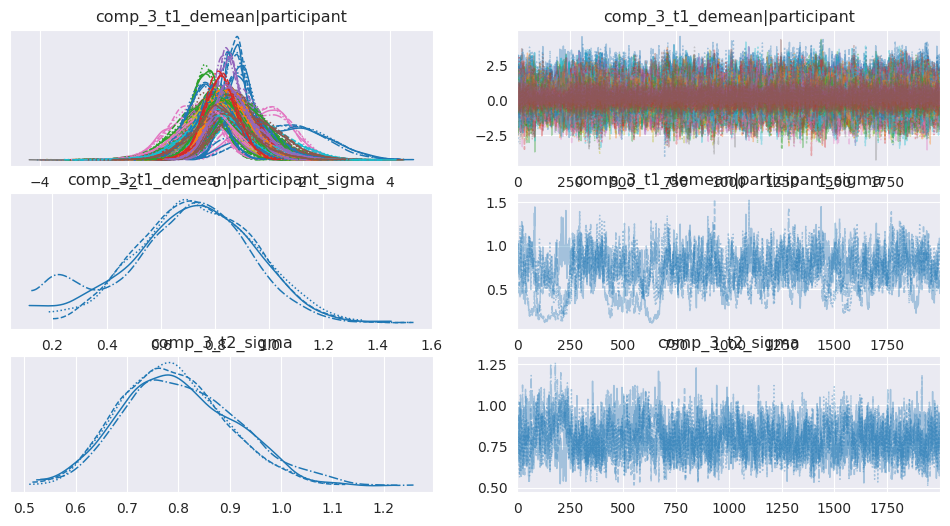

In [43]:
for model in comp:
    az.plot_trace(fitted_models['null'][model], compact=True)

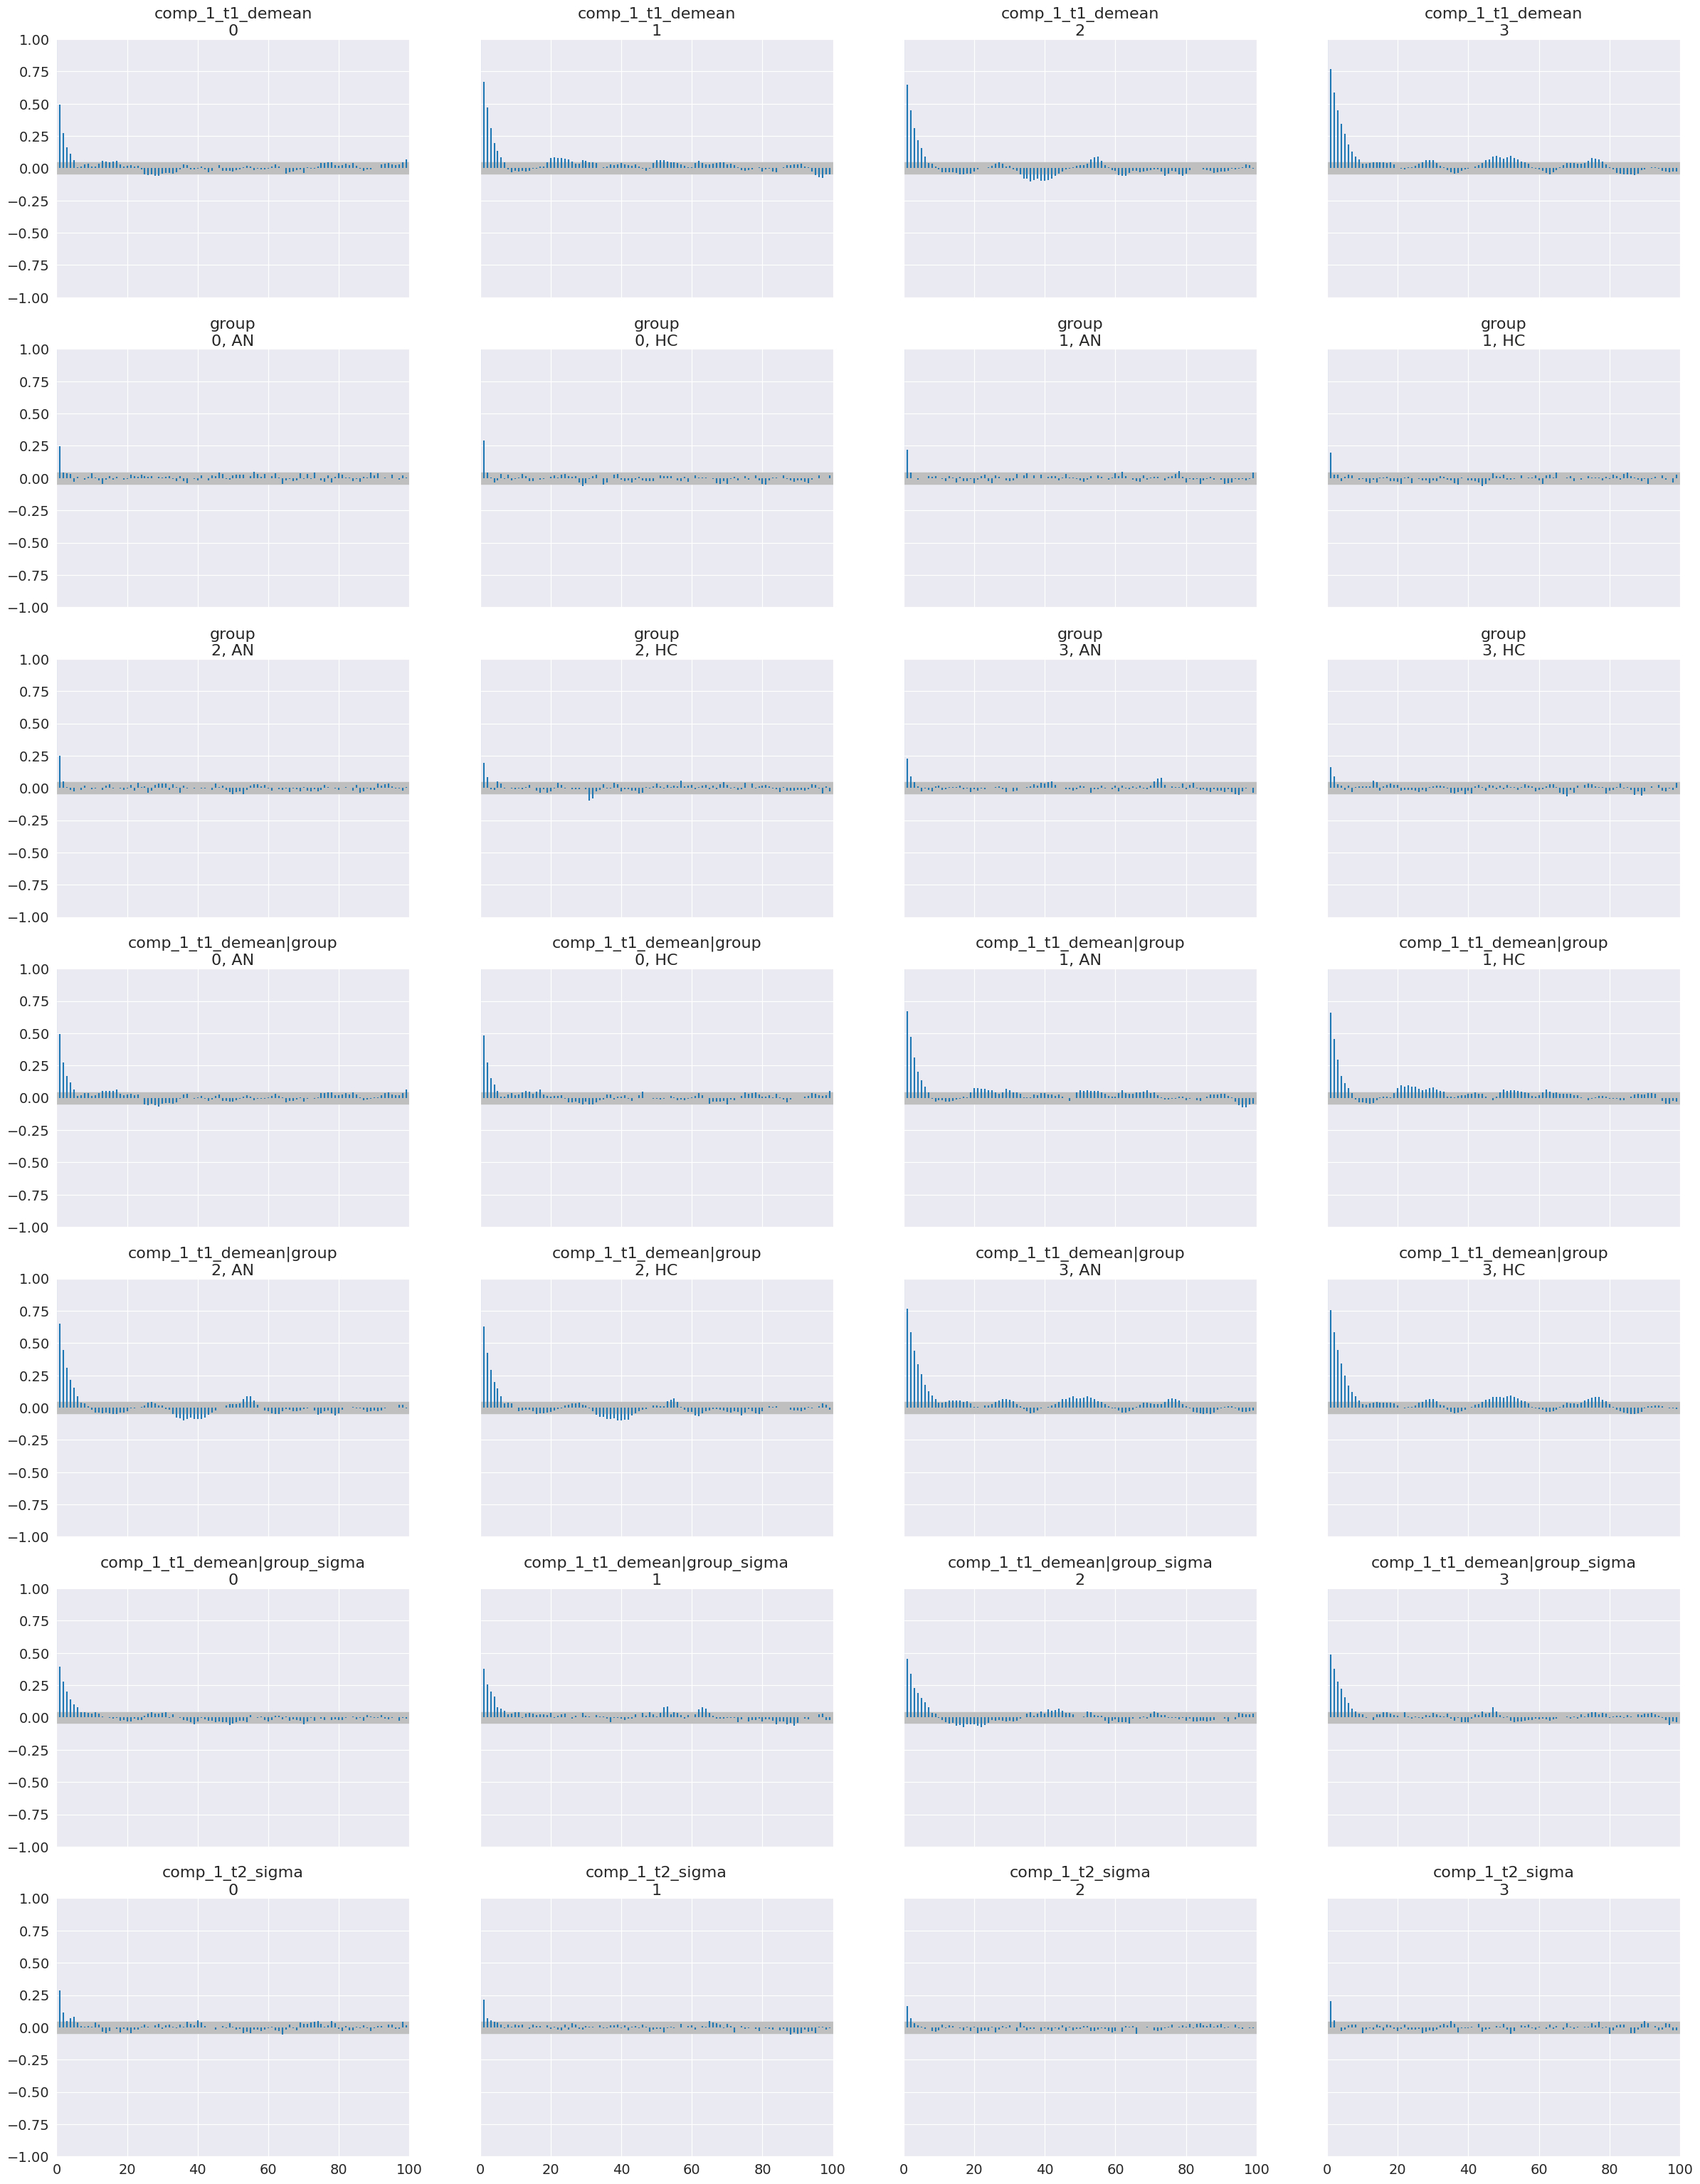

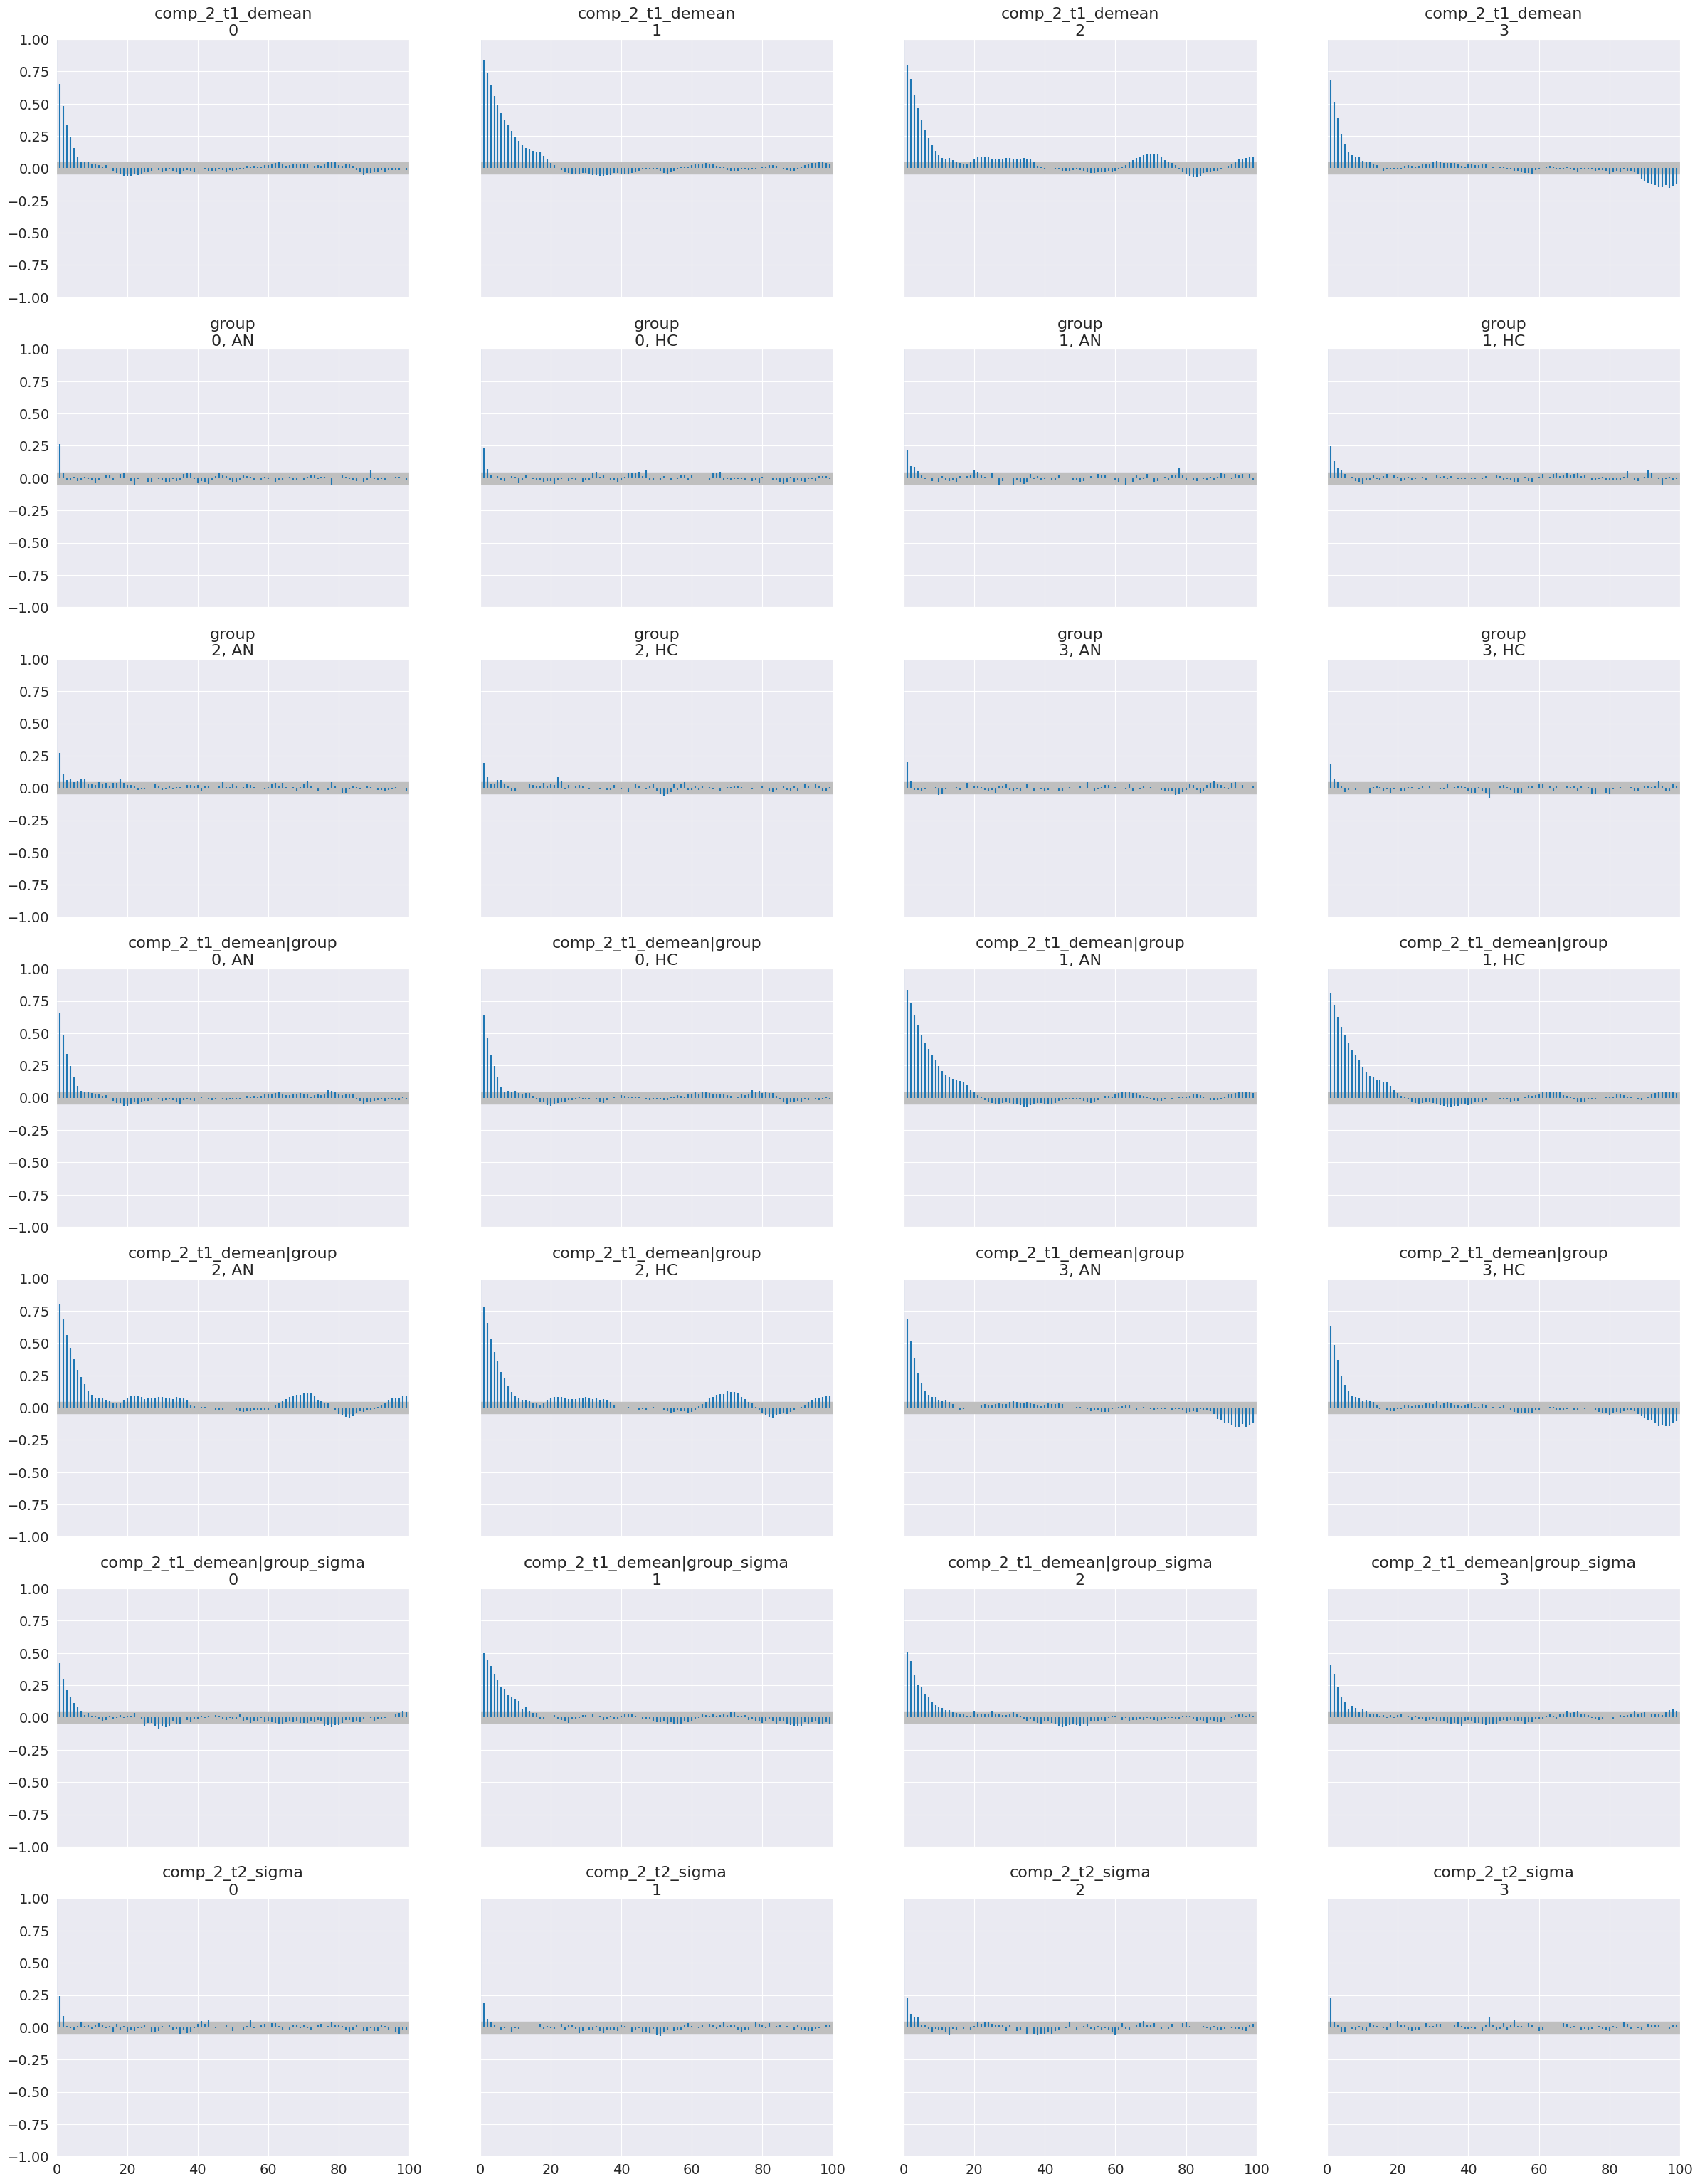

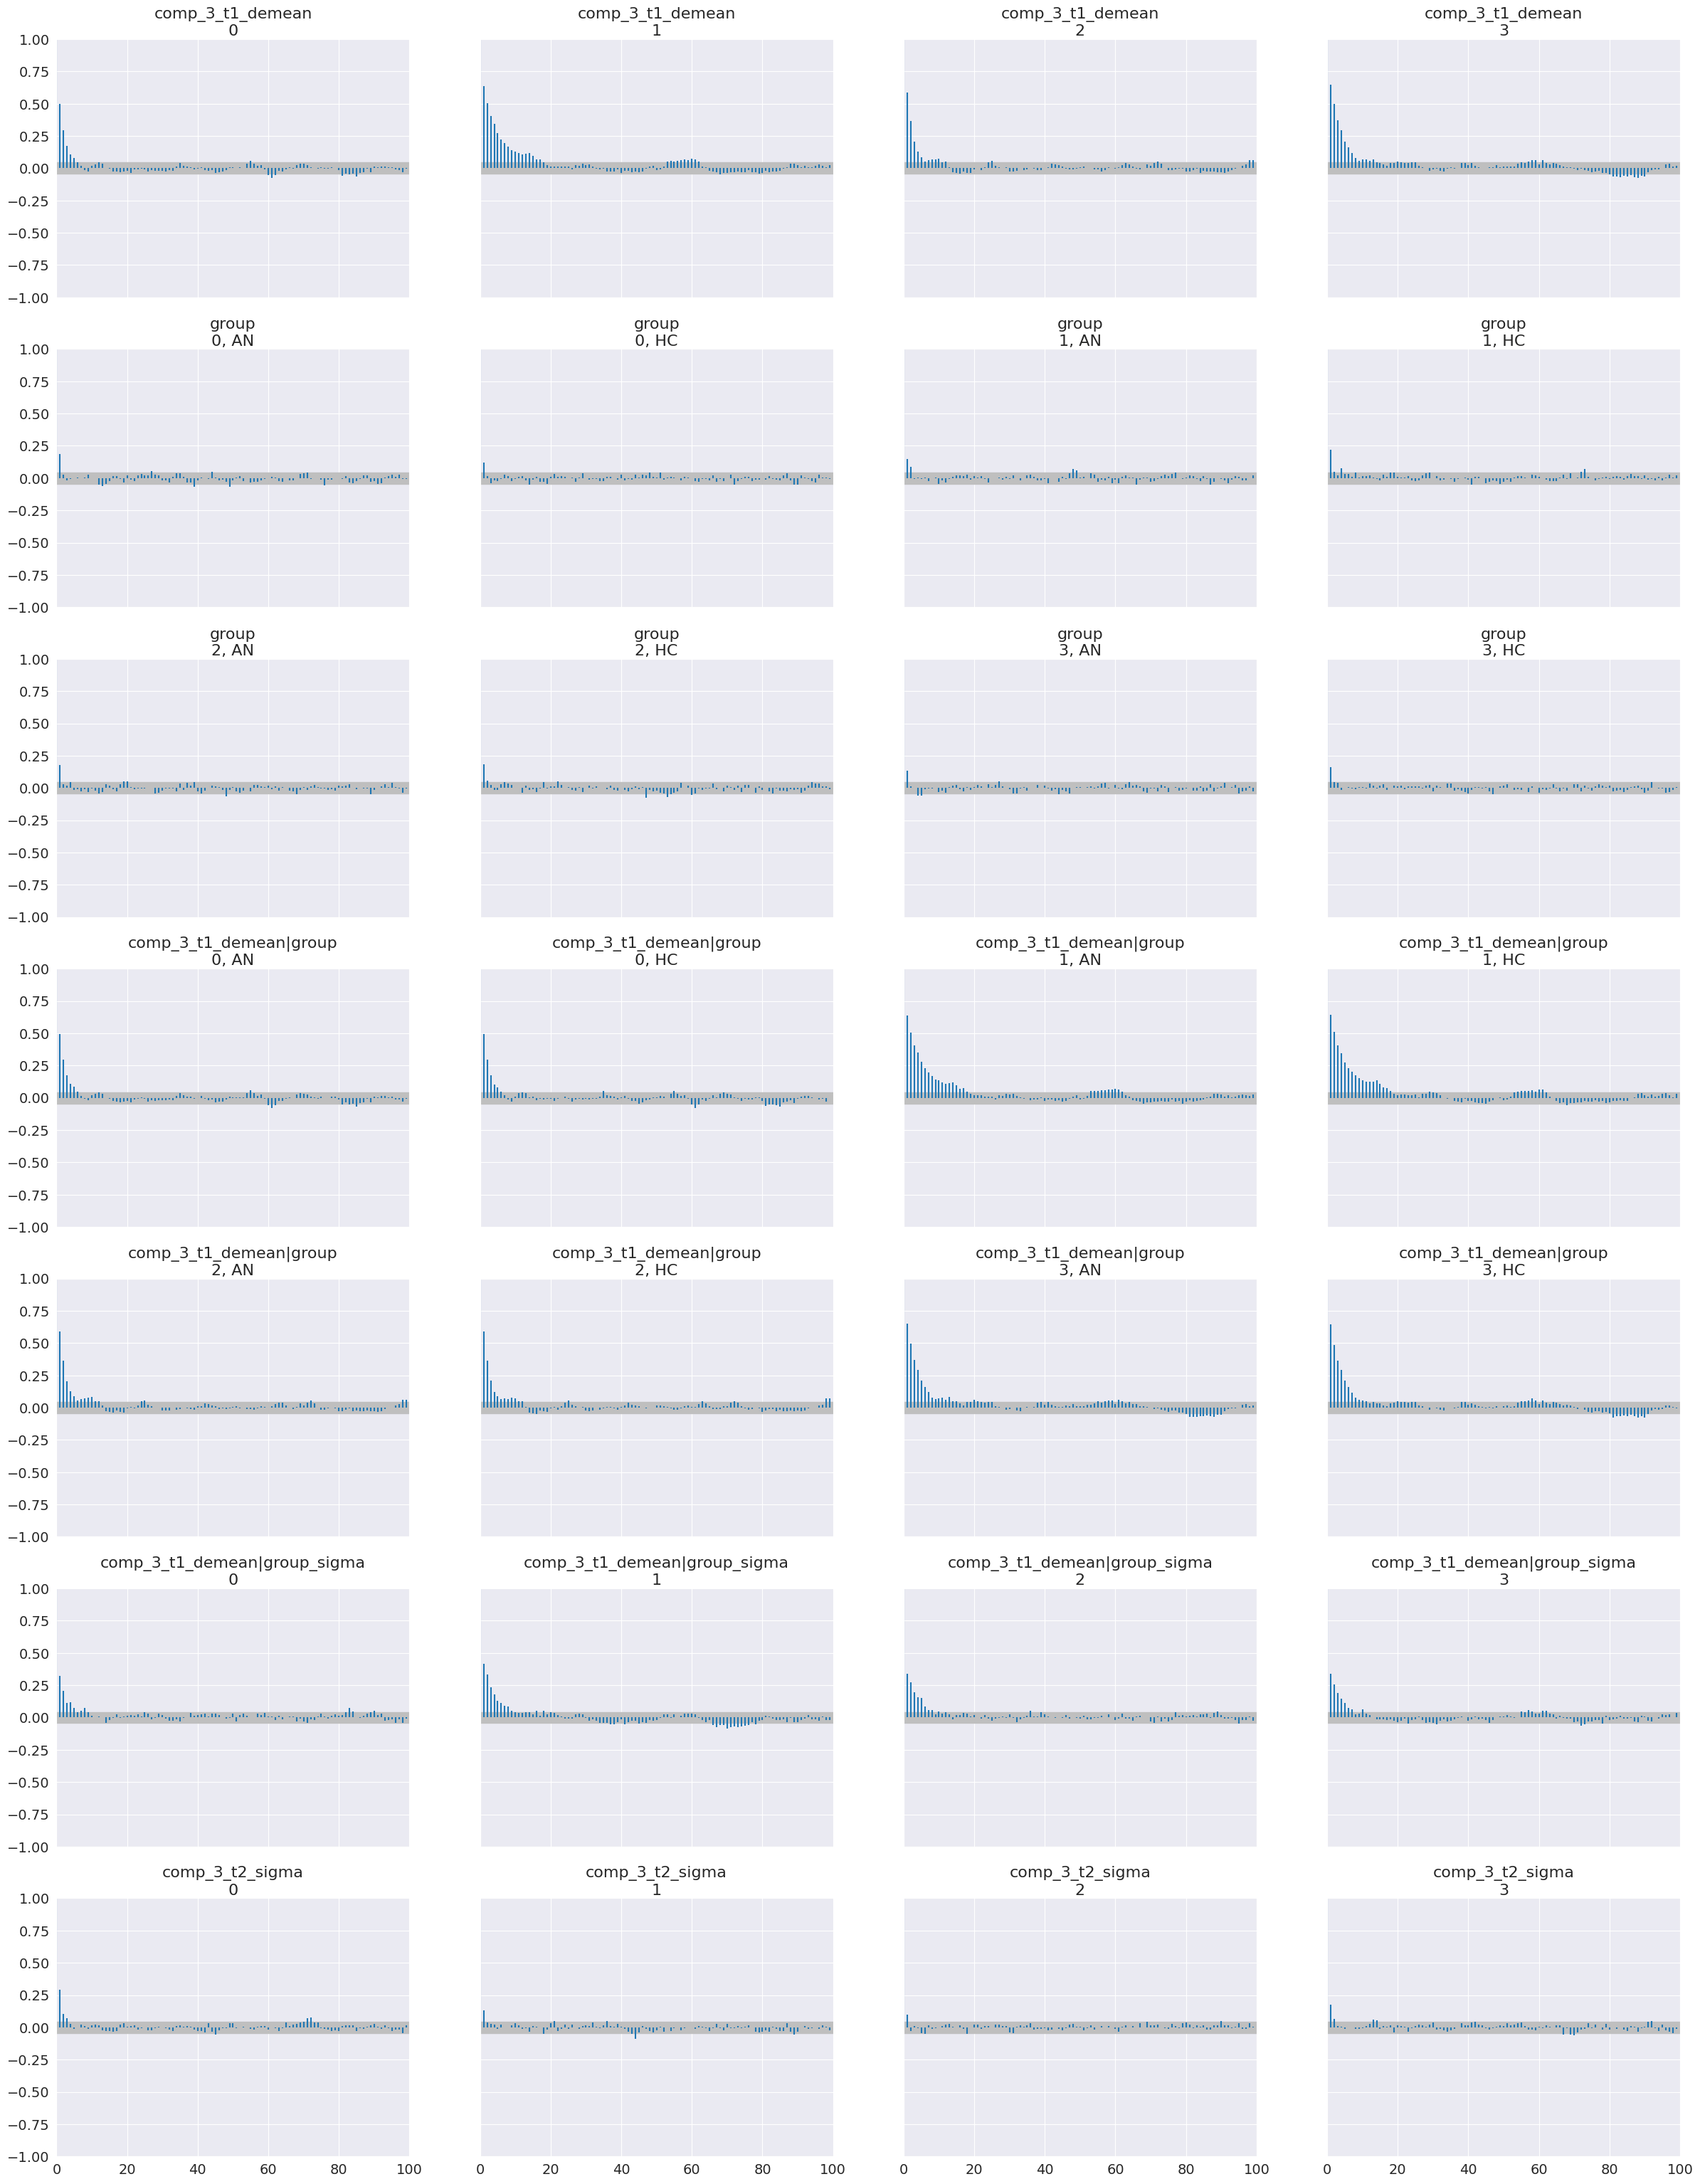

In [44]:
for model in comp:
    az.plot_autocorr(fitted_models['alternative'][model])

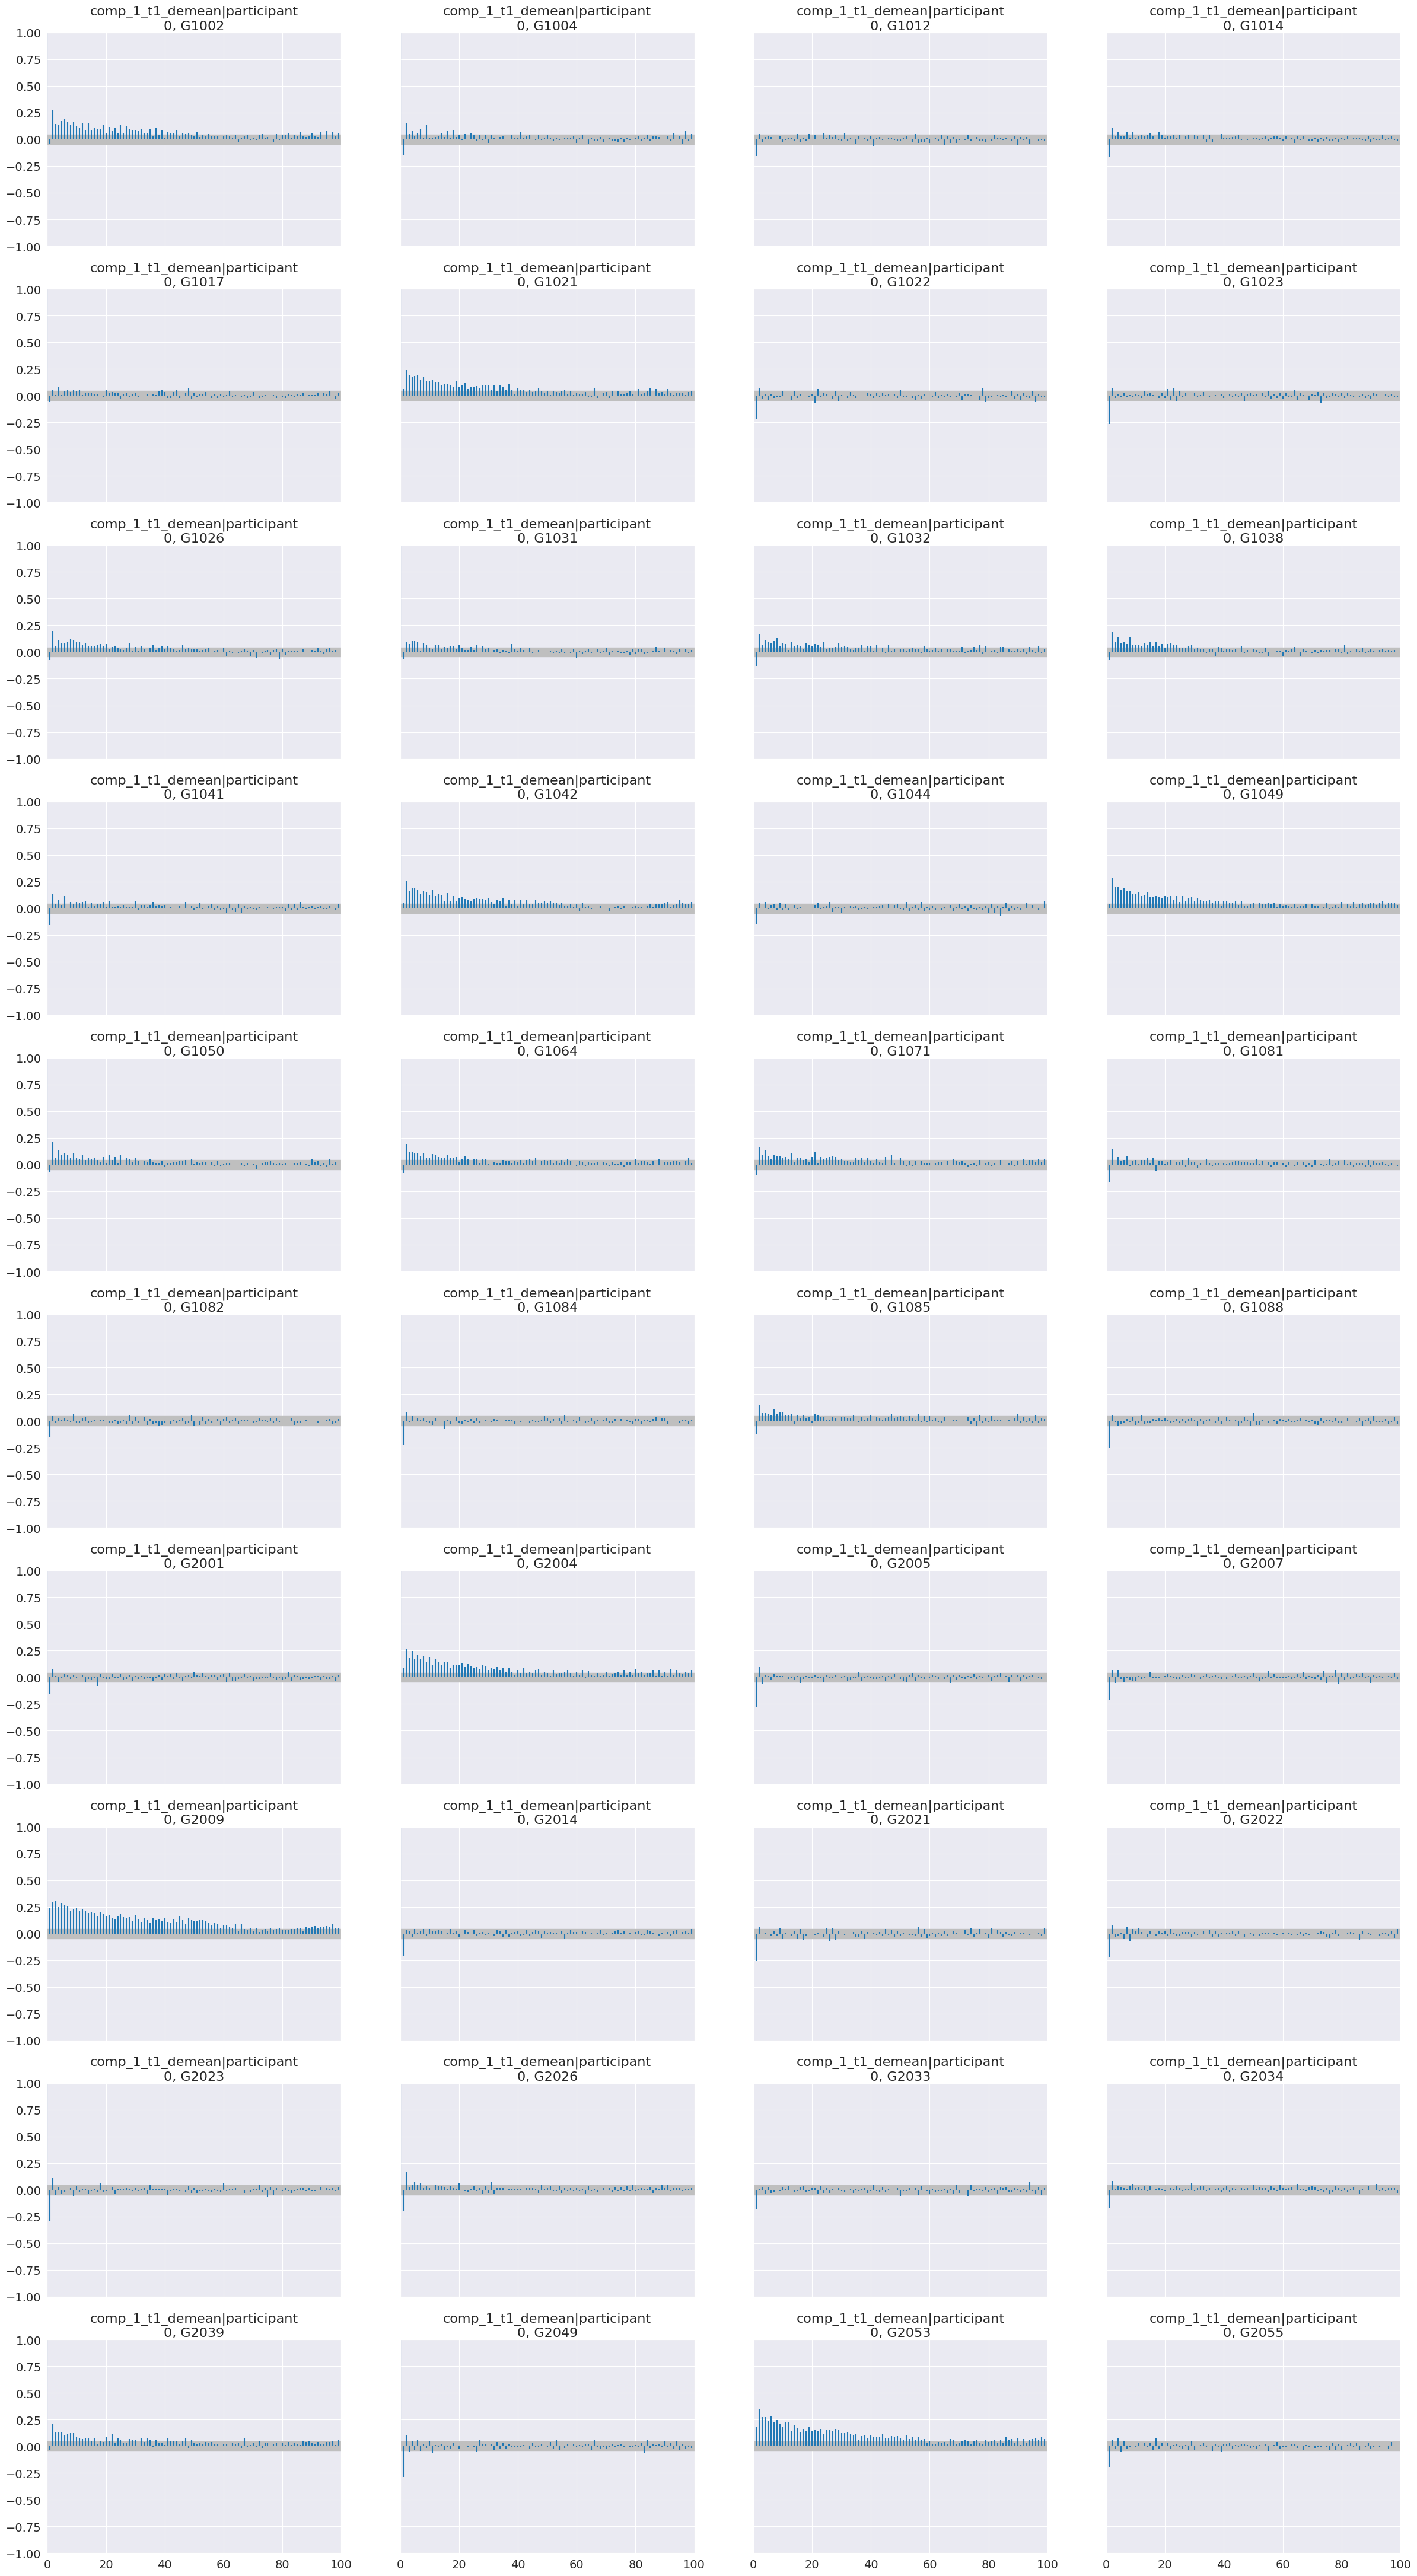

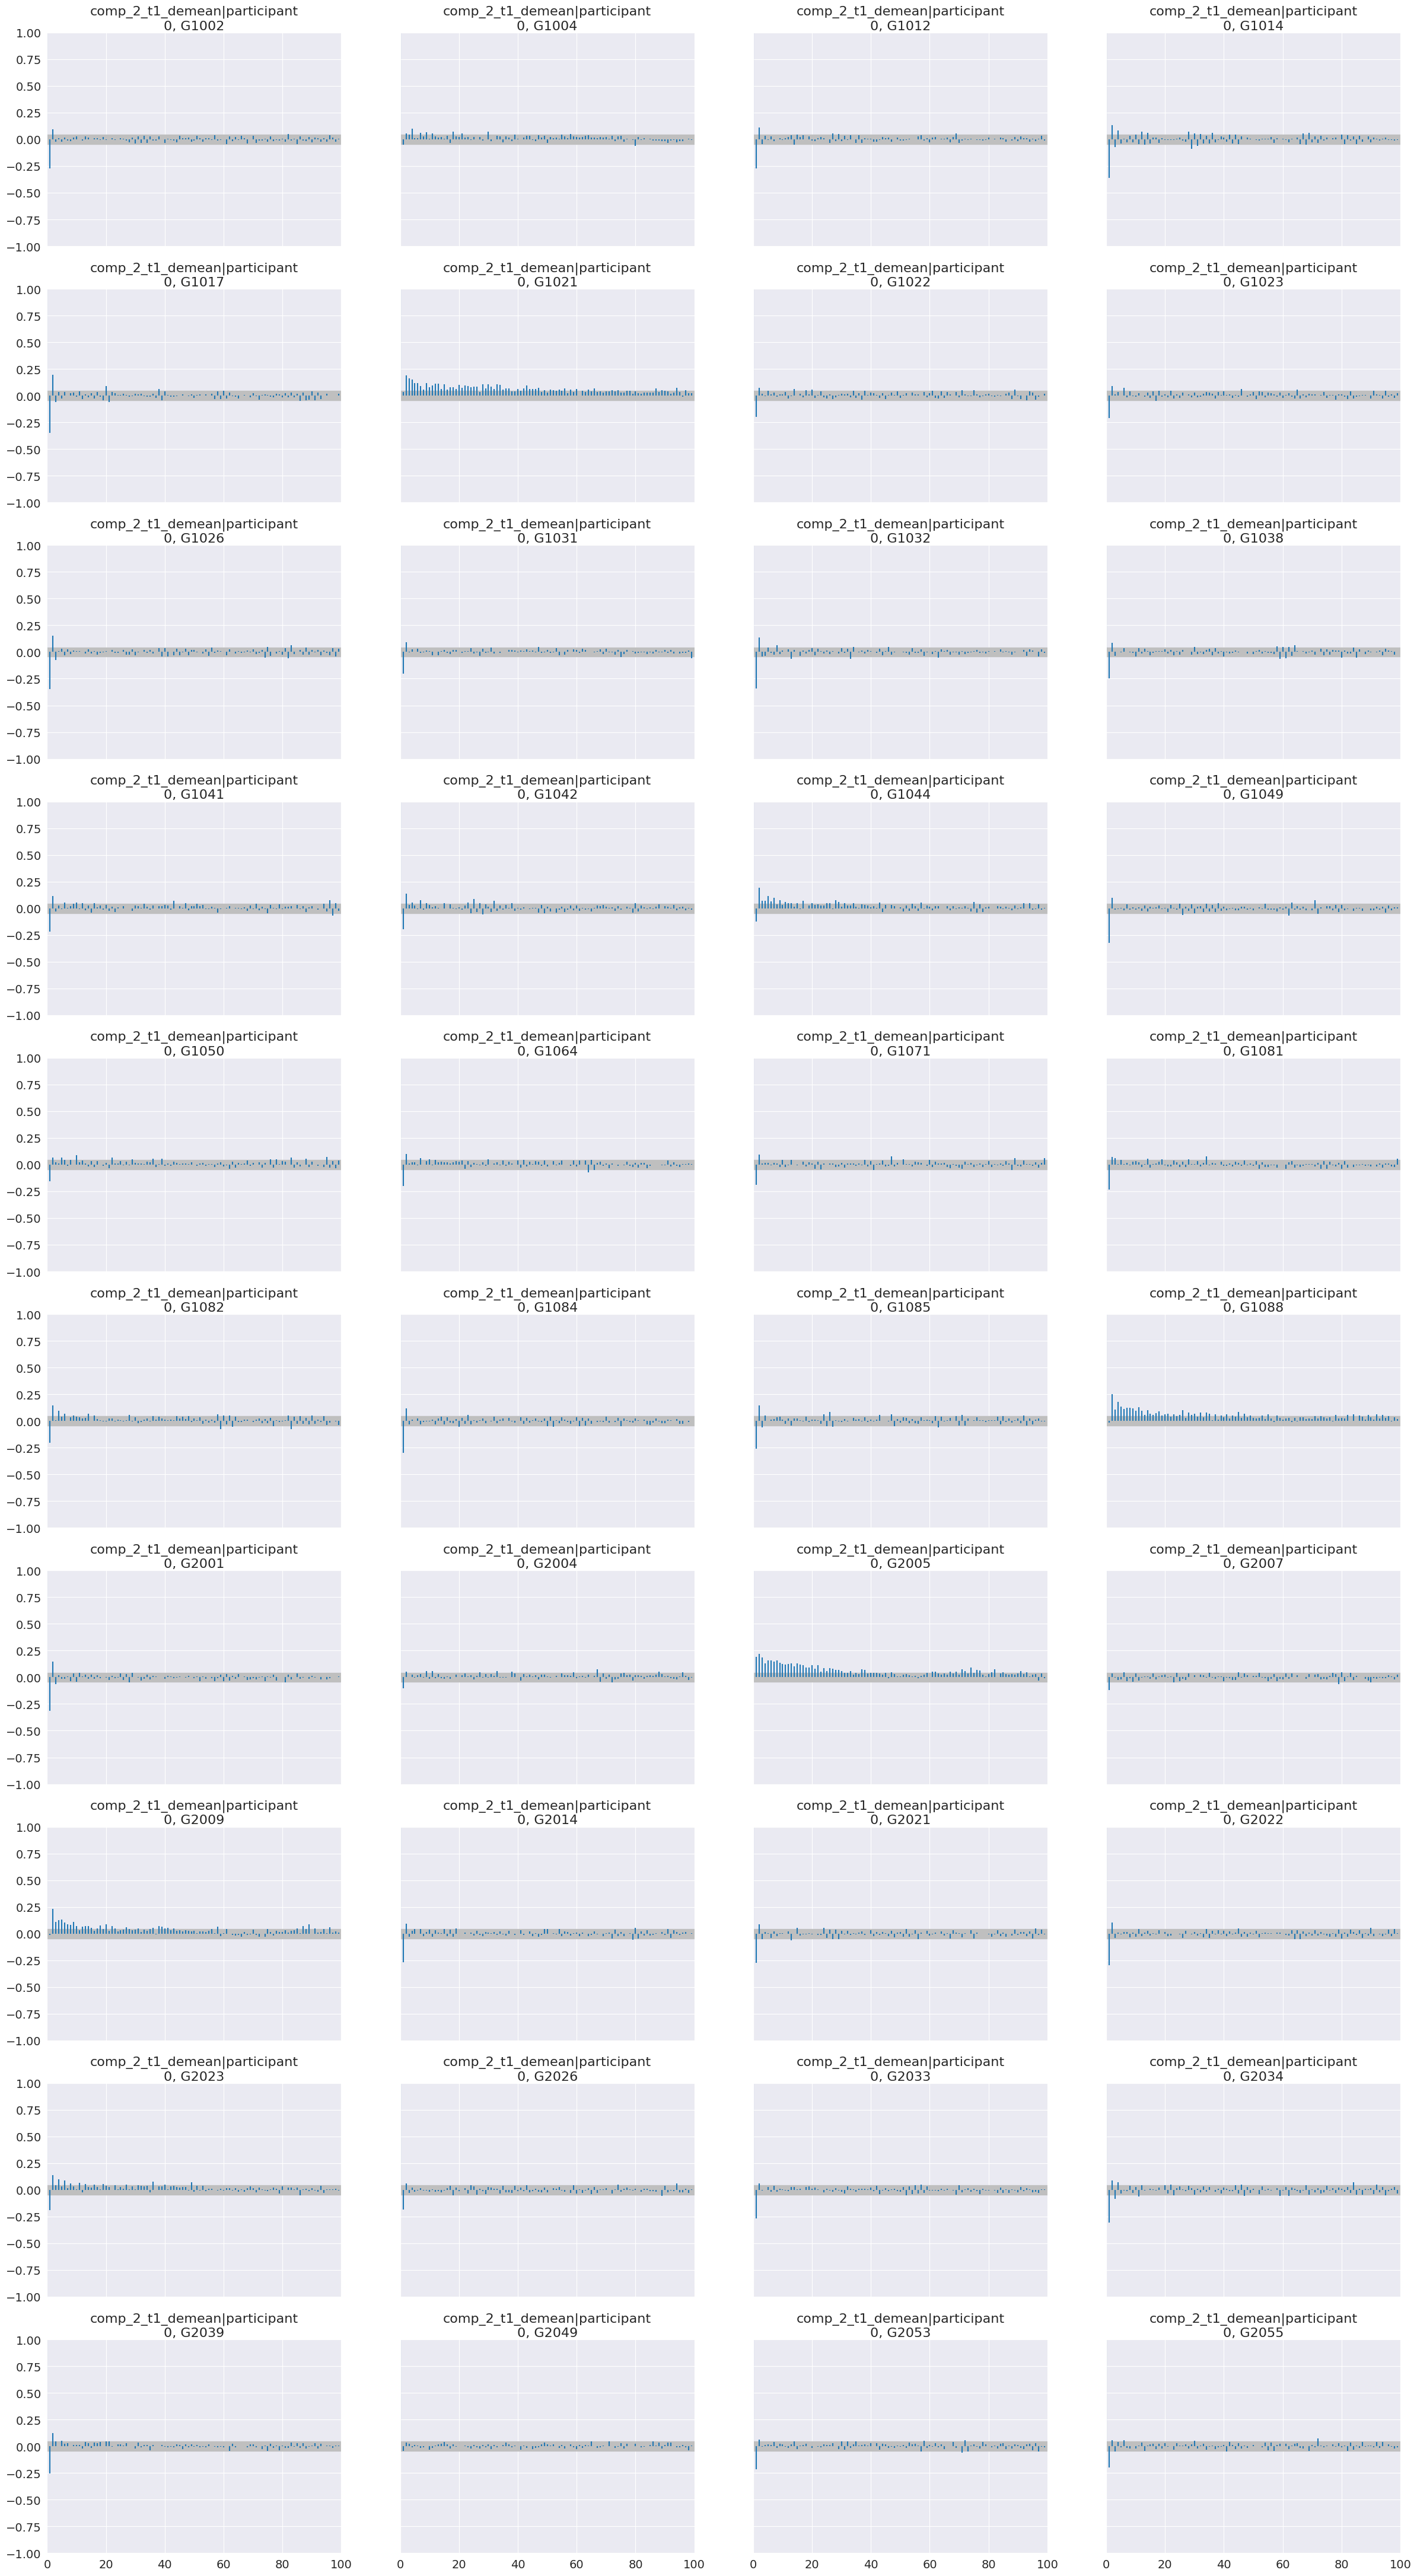

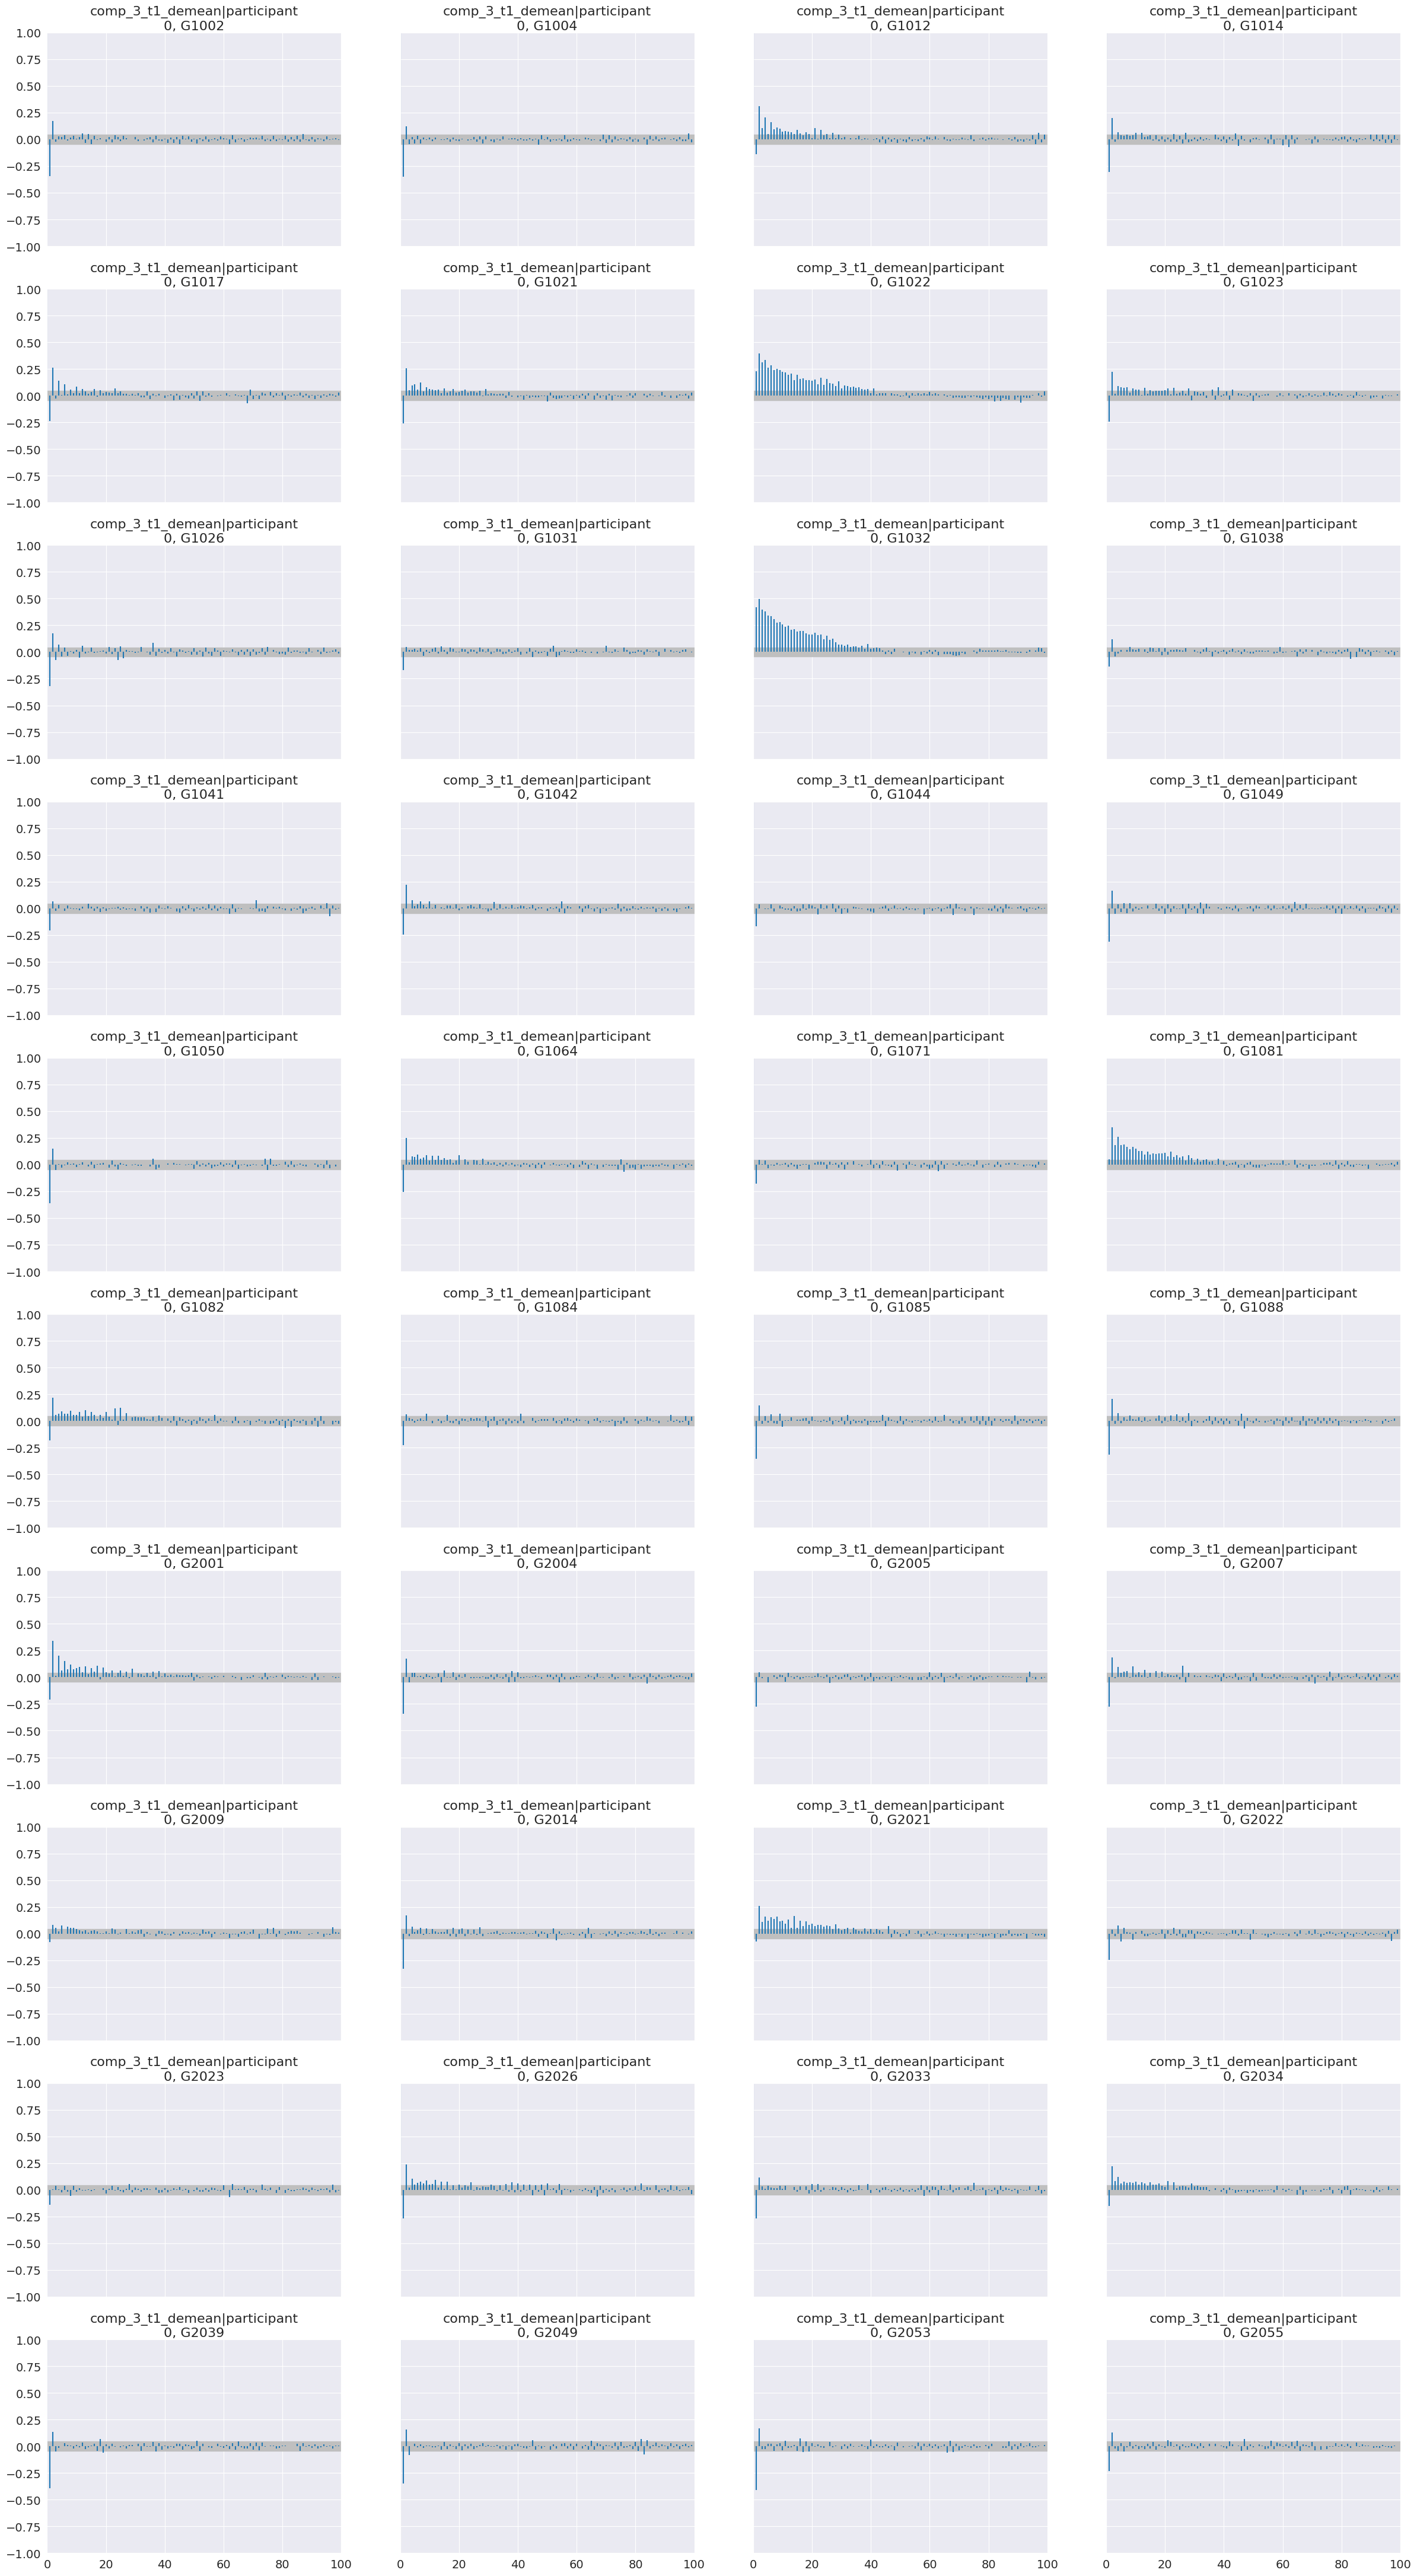

In [45]:
for model in comp:
    az.plot_autocorr(fitted_models['null'][model])

In [46]:
model_summary = {}

for component in comp:
    summary = az.summary(fitted_models['alternative'][component], hdi_prob=0.9)
    model_summary[component] = summary

In [47]:
save_pickle('model_summary_group', model_summary )

In [48]:
fitted_models = load_pickle('fitted_models')

In [49]:
import statsmodels.api as sm

data = pd.concat([pd.get_dummies(pca_df['group']), pca_df], axis=1).rename(columns={'AN':'group[AN]', 'HC':'group[HC]'}).dropna()
slopes = {}

for component in comp:
    # the names of the predictors
    varnames = ['group[AN]', 'group[HC]', f'{component}_t1_demean']
    
    # compute the needed statistics like R-squared when each predictor is response and all the
    # other predictors are the predictor
    
    # x_matrix = common effects design matrix (excluding intercept/constant term)
    terms = [t for t in models['alternative'][component].common_terms.values() if t.name != "Intercept"]
    x_matrix = [pd.DataFrame(x.data, columns=x.levels) for x in terms]
    x_matrix = pd.concat(x_matrix, axis=1)
    x_matrix.columns = varnames
    
    dm_statistics = {
        'r2_x': pd.Series(
            {
                x: sm.OLS(
                    endog=x_matrix[x],
                    exog=sm.add_constant(x_matrix.drop(x, axis=1))
                    if "Intercept" in models['alternative'][component].term_names
                    else x_matrix.drop(x, axis=1),
                )
                .fit()
                .rsquared
                for x in list(x_matrix.columns)
            }
        ),
        'sigma_x': x_matrix.std(),
        'mean_x': x_matrix.mean(axis=0),
    }
    r2_x = dm_statistics['r2_x']
    sd_x = dm_statistics['sigma_x']
    r2_y = pd.Series([sm.OLS(endog=data[f'{component}_t2'],
                             exog=sm.add_constant(data[[p for p in varnames if p != x]])).fit().rsquared
                      for x in varnames], index=varnames)
    sd_y = pca_df[f'{component}_t2'].std()
    
    # compute the products to multiply each slope with to produce the partial correlations
    slope_constant = (sd_x[varnames] / sd_y) * ((1 - r2_x[varnames]) / (1 - r2_y)) ** 0.5
    slopes[component] = slope_constant

In [ ]:
correlation_coeffients = dict(zip([component for component in comp], [dict for component in comp]))

for component in comp:
    sample = fitted_models['alternative'][component].posterior['group']


    correlation_coeffients[component] = {
        'an_joint_posterior_distribution': sample.sel(group_dim="AN") * slopes[component]['group[AN]'],
        'hc_joint_posterior_distribution' : sample.sel(group_dim="HC") * slopes[component]['group[HC]'],
        'comp_joint_posterior_distribution' : fitted_models['alternative'][component].posterior[f'{component}_t1_demean'] * slopes[component][f'{component}_t1_demean']
    }

In [ ]:
save_pickle('correlation_coeffients_group', correlation_coeffients)